![](https://bemoneyaware.com/wp-content/uploads/2014/10/types-of-leaves-sick-maternity-lop.png)

### This dataset contains 8 input features which are:

* Education: Level of Education(Bachelors, Masters and PHD)
* Joining year: The year of joining
* City: To which city the employee belongs to
* PaymentTier: Salary Tiers
* Age: The age of the Employee
* Gender: Male and Female
* EverBenched: Everbenched (yes or no)
* experience in current domain: Employee experience in terms of years
And based on these input features, our main goal is to predict whether the Employee leave or not.

## Steps in the projects:

#### Data pre-processing and preprocessing:
* Load the data and check the data information, shape, null values, etc.
* Do some exploratory data analysis (EDA) to answer questions about the data.
### Machine learning:
* Install the required libraries for machine learning.
* Convert the categorical columns to numerical.
* Split the data into train and test sets.
* Create a machine learning function to apply all classification algorithms.
* Apply imbalancing techniques.
### Hyperparameter tuning

In [1]:
# Install the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data set using the pandas read function
data=pd.read_csv('/kaggle/input/employee-dataset/Employee.csv')
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [3]:
#Checking the data shape
data.shape

(4653, 9)

In [4]:
# Checking the data information about the columns ans their data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [5]:
# Checking the null values in the data
data.isna().sum()/len(data)*100

Education                    0.0
JoiningYear                  0.0
City                         0.0
PaymentTier                  0.0
Age                          0.0
Gender                       0.0
EverBenched                  0.0
ExperienceInCurrentDomain    0.0
LeaveOrNot                   0.0
dtype: float64

# Explore Data Analysis (EDA)
#### Questions asked from the data 
* What is the most common education level in the data?
* What is the percentage of male and female candidates in the data?
* Visualize the age distribution of the candidates using a histogram.
* Using groupby condition, visualize the total number of male and female candidates who completed their education in bachelor, master, etc.
* Create a table to visualize the education with years of experience sum of the candidates.

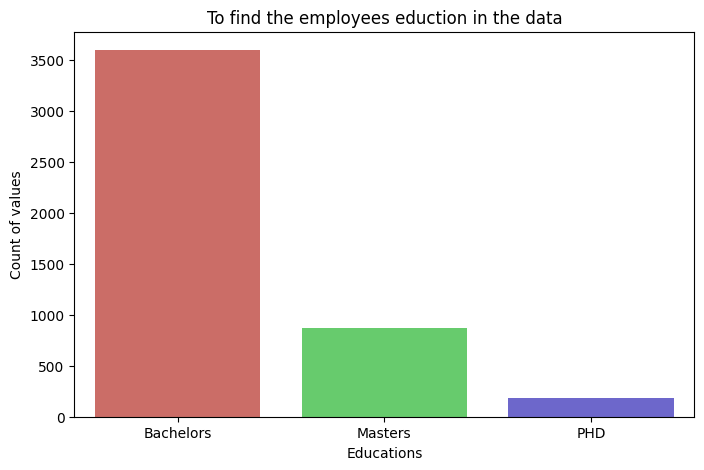

In [6]:
# To create a count plot to understanding the most demanding education
plt.figure(figsize=(8,5))
sns.countplot(data=data,x='Education',palette='hls')
plt.title("To find the employees eduction in the data")
plt.xlabel("Educations")
plt.ylabel("Count of values")
plt.show()

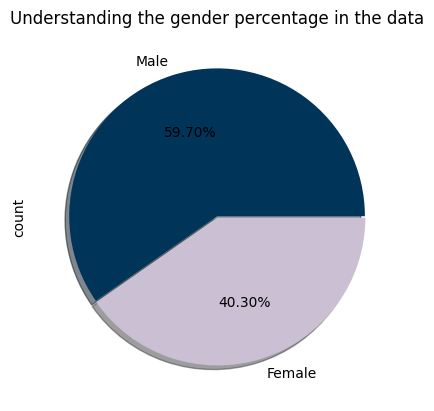

In [7]:
# Understanding the gender percentage
data['Gender'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',explode=[0,0.01],
    labels=['Male','Female'],
    colors=['#003459','#cbc0d3'],
    autopct='%1.2f%%',
    shadow=True)
plt.title("Understanding the gender percentage in the data")
plt.show()

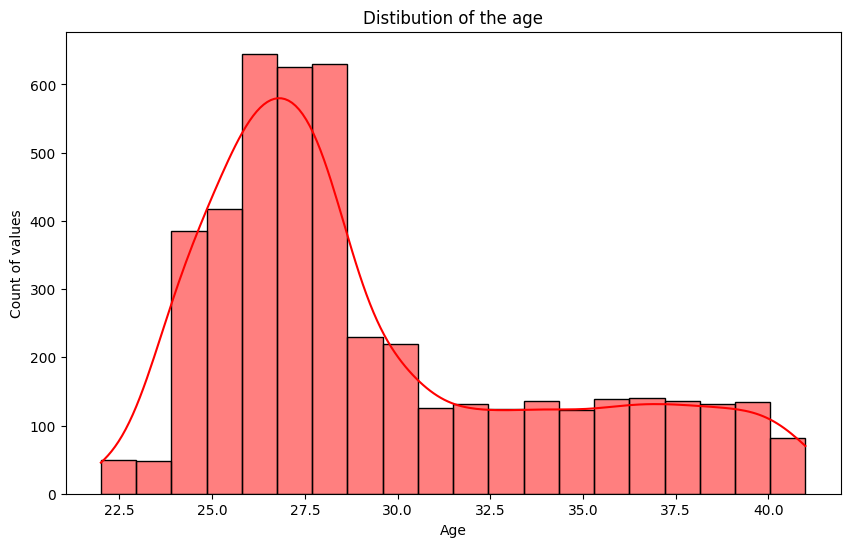

In [8]:
# Create a histogram to understand the age disttibution
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='Age',bins=20,kde=True,color='red')
plt.title("Distibution of the age")
plt.xlabel("Age")
plt.ylabel("Count of values")
plt.show()

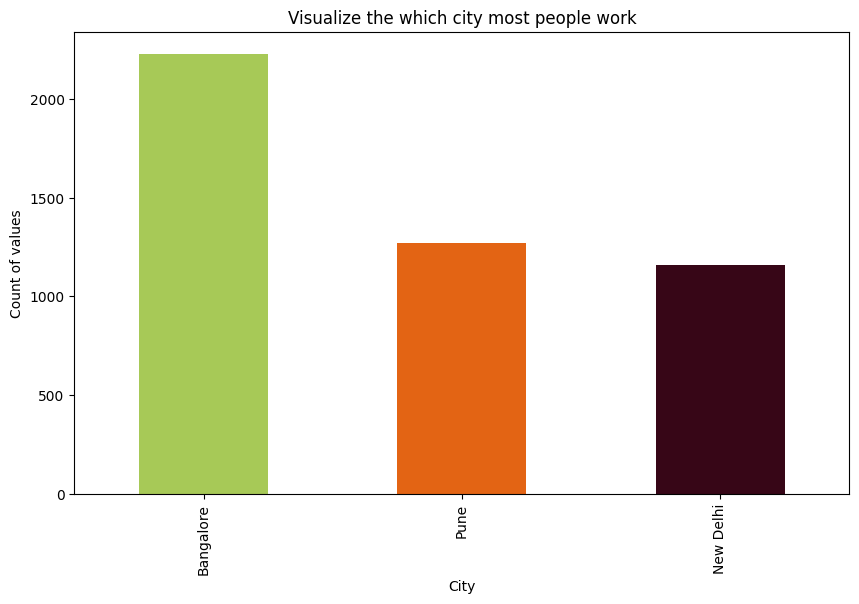

In [9]:
# Visualize the bar plot to understanding the which city most people come to work
data['City'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(10,6),color=['#a7c957','#e36414','#370617'])
plt.title("Visualize the which city most people work")
plt.xlabel("City")
plt.ylabel("Count of values")
plt.show()

In [10]:
# Checking the education qualification with gener wise
data.groupby(['Education'])['Gender'].value_counts().sort_values(ascending=False)\
.unstack().style.background_gradient(cmap='gnuplot2_r')

Gender,Female,Male
Education,,
Bachelors,1435,2166
Masters,371,502
PHD,69,110


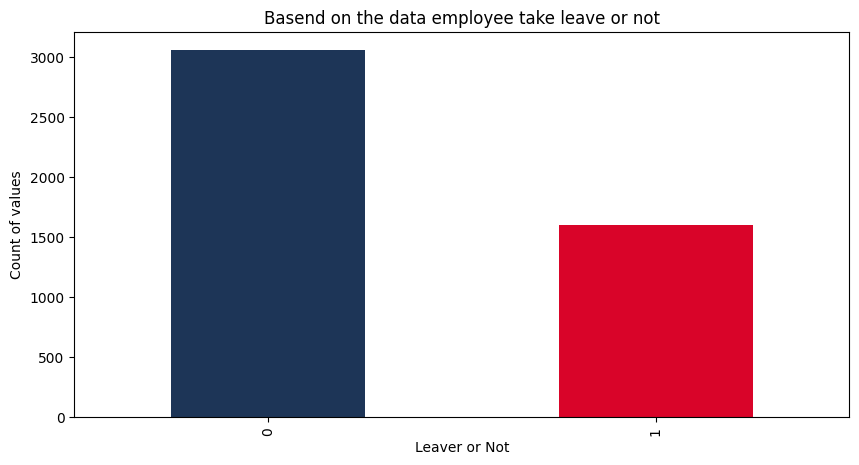

In [11]:
data['LeaveOrNot'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',title="Basend on the data employee take leave or not",figsize=(10,5),color=['#1d3557','#d90429'])
plt.xlabel("Leaver or Not")
plt.ylabel("Count of values")
plt.show()

### Observatios from the above data:
* Most of the employees in the data have completed a bachelor's degree, followed by a master's degree, and finally a PhD.
* In the pie chart, we observed that 58% of the employees are male.
* In the histogram, most of the employees are between 25 and 30 years old.
* Most of the employees come from Bengaluru, followed by Pune, and then Delhi.
* Using the groupby function, we observed that male candidates with a bachelor's degree dominate the chart. We can strongly conclude that male candidates dominate.
* In the output plot, based on the data, we can see that most employees do not take leave.

In [12]:
# Based on the education and experience we visualize the table to understanding the each education sum of the expiernce candidates
data.groupby(['Education'])['ExperienceInCurrentDomain'].value_counts().sort_values(ascending=False)\
.unstack().style.background_gradient(cmap='afmhot_r')

ExperienceInCurrentDomain,0,1,2,3,4,5,6,7
Education,,,,,,,,
Bachelors,304.000000,462.000000,721.000000,639.000000,738.000000,722.000000,7.000000,8.000000
Masters,37.000000,70.000000,328.000000,116.000000,169.000000,151.000000,1.000000,1.000000
PHD,14.000000,26.000000,38.000000,31.000000,24.000000,46.000000,nan,nan


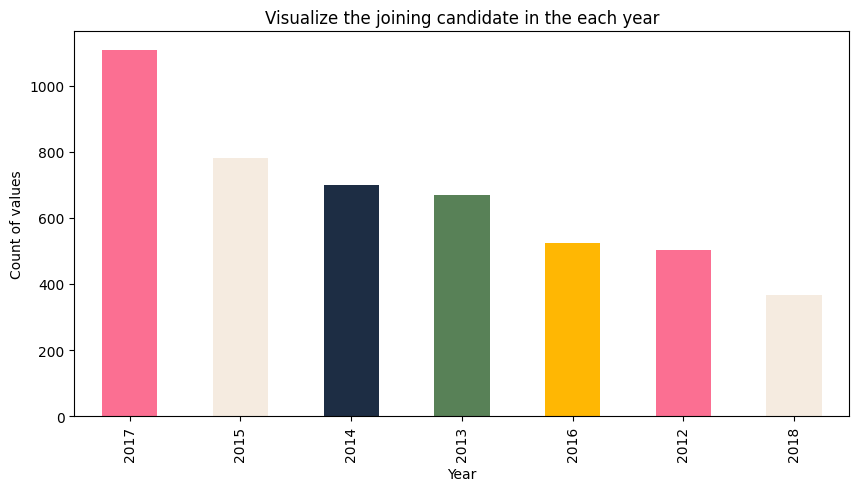

In [13]:
# Visualize the which year most of the employees joined
colors=['#fb6f92','#f5ebe0','#1d2d44','#588157','#ffb703']
data['JoiningYear'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',title="Visualize the joining candidate in the each year",figsize=(10,5),color=colors)
plt.xlabel("Year")
plt.ylabel("Count of values")
plt.show()

In [14]:
# create a data frame for the paymenttier with education with city and and unstack the data 
pd.DataFrame(data.groupby(['Education'])[['City','PaymentTier']].value_counts().unstack()).style.background_gradient(cmap='bone_r')

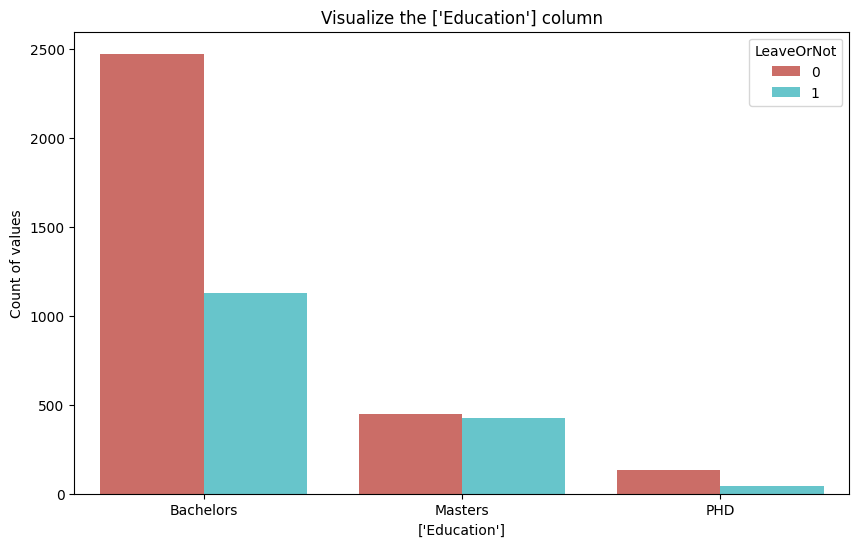

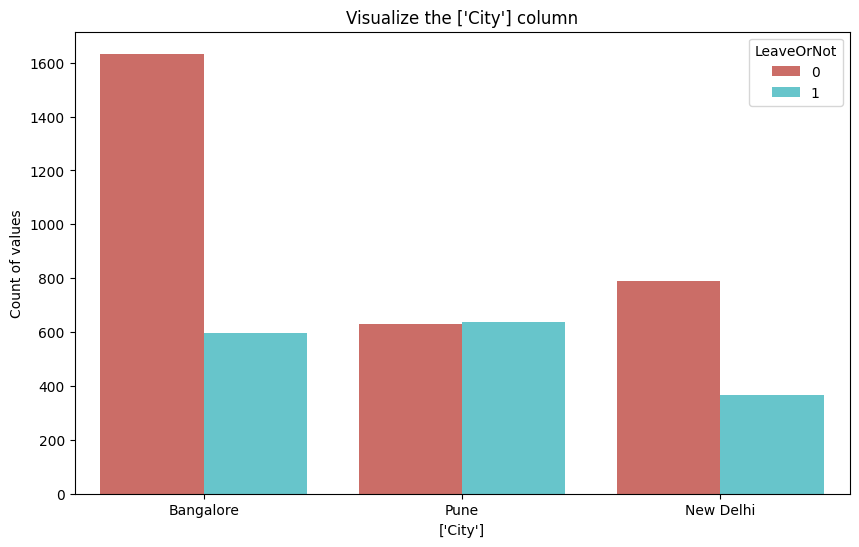

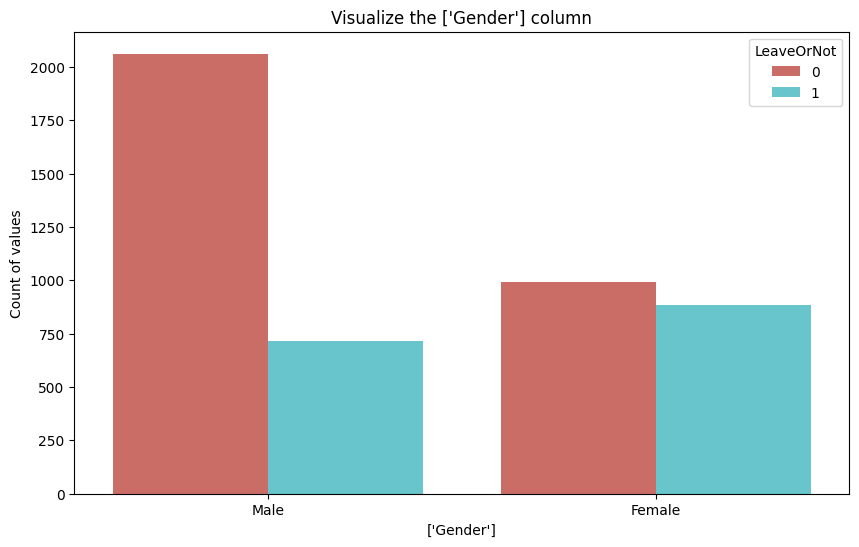

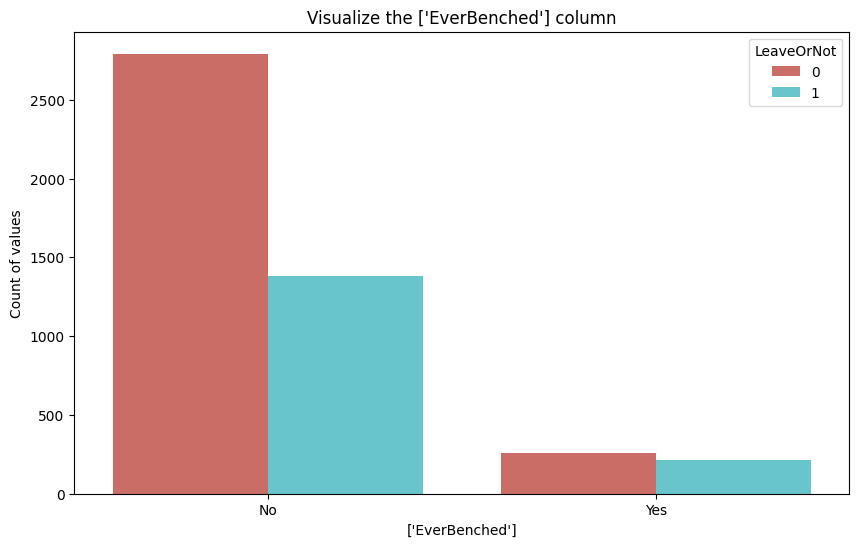

In [15]:
# create a count plot to under standing the leave or not some categorical columns
for i in ['Education','City','Gender','EverBenched']:
    plt.figure(figsize=(10,6))
    sns.countplot(data=data,x=data[i],hue='LeaveOrNot',palette='hls')
    plt.title(f'Visualize the {[i]} column')
    plt.xlabel(f'{[i]}')
    plt.ylabel("Count of values")
    plt.show()

# Machine Learning Modeling

In [16]:
# import the requried libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [17]:
# Covert the categorical data into numerical data using label encoder
for i in data.select_dtypes(include='object'):
    label=LabelEncoder()
    label.fit(data[i])
    data[i]=label.transform(data[i])
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


In [18]:
# Split the data into train and test data
X=data.drop(['LeaveOrNot'],axis=1)
y=data['LeaveOrNot']
# Then spliting the data train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=45)

In [19]:
#Create function for machine learning for all classification problem
def classification_model(model,X_train,X_test,y_train,y_test):
    print(f'{model}')
    model.fit(X_train,y_train)
    model_pred=model.predict(X_test)
    print(f'The {model} accuracy score {accuracy_score(y_test,model_pred)*100:.2f}')
    print(f'\n the classification report {classification_report(y_test,model_pred)}')
    print(f'\n the confusion_matrix {confusion_matrix(y_test,model_pred)}')
    print("-*"*30)
    ConfusionMatrixDisplay.from_predictions(y_test,model_pred,cmap="Greens")
    plt.show()

In [20]:
models={
    'logistic':LogisticRegression(),
    'random':RandomForestClassifier(),
    'tree':DecisionTreeClassifier(),
    'knn':KNeighborsClassifier(),
    'xgb':XGBClassifier()
}

LogisticRegression()
The LogisticRegression() accuracy score 70.10

 the classification report               precision    recall  f1-score   support

           0       0.73      0.88      0.80       787
           1       0.57      0.32      0.41       377

    accuracy                           0.70      1164
   macro avg       0.65      0.60      0.60      1164
weighted avg       0.68      0.70      0.67      1164


 the confusion_matrix [[696  91]
 [257 120]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


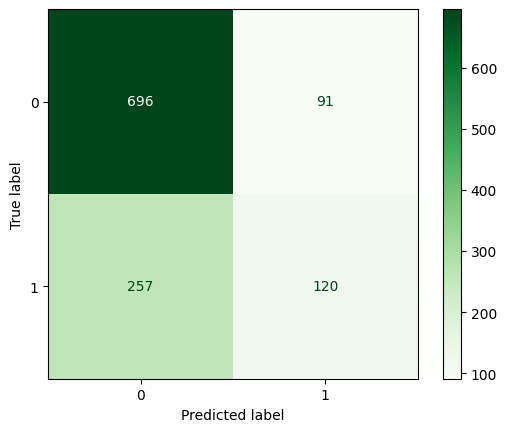

RandomForestClassifier()
The RandomForestClassifier() accuracy score 82.22

 the classification report               precision    recall  f1-score   support

           0       0.85      0.90      0.87       787
           1       0.76      0.67      0.71       377

    accuracy                           0.82      1164
   macro avg       0.80      0.78      0.79      1164
weighted avg       0.82      0.82      0.82      1164


 the confusion_matrix [[706  81]
 [126 251]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


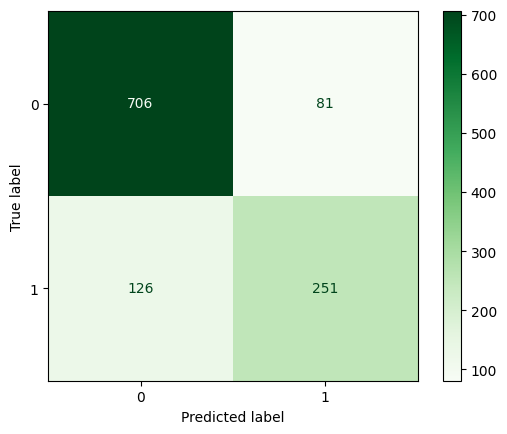

DecisionTreeClassifier()
The DecisionTreeClassifier() accuracy score 79.64

 the classification report               precision    recall  f1-score   support

           0       0.85      0.86      0.85       787
           1       0.69      0.67      0.68       377

    accuracy                           0.80      1164
   macro avg       0.77      0.76      0.77      1164
weighted avg       0.80      0.80      0.80      1164


 the confusion_matrix [[673 114]
 [123 254]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


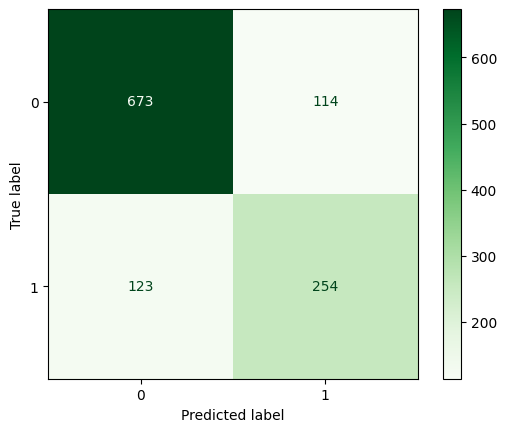

KNeighborsClassifier()
The KNeighborsClassifier() accuracy score 78.26

 the classification report               precision    recall  f1-score   support

           0       0.81      0.89      0.85       787
           1       0.71      0.56      0.63       377

    accuracy                           0.78      1164
   macro avg       0.76      0.72      0.74      1164
weighted avg       0.78      0.78      0.78      1164


 the confusion_matrix [[700  87]
 [166 211]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


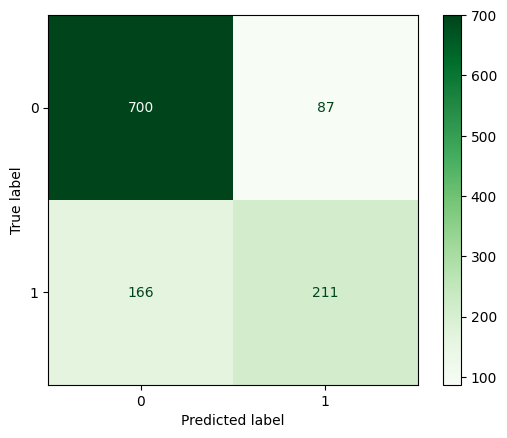

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
The XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,

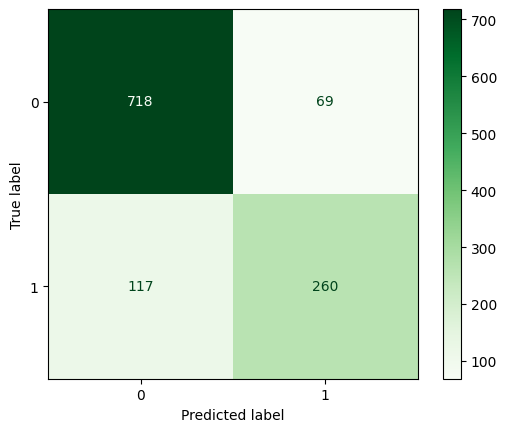

In [21]:
for i in range(len(models)):
    model_names=list(models.values())[i]
    features=list(models.keys())[i]
    classification_model(model_names,X_train,X_test,y_train,y_test)
    

# Imbalancing techinque used

In [22]:
from collections import Counter


In [23]:
from imblearn.over_sampling import RandomOverSampler
ns=RandomOverSampler()
X_train_ns,y_train_ns=ns.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 2266, 1: 1223})
The number of classes after fit Counter({0: 2266, 1: 2266})


In [24]:
import sklearn
def classification_model_after_balancing(model,X_train,X_test,y_train,y_test):
    X_train_ns,y_train_ns=ns.fit_resample(X_train,y_train)
    print(f'{model}')
    if not isinstance(model, sklearn.base.BaseEstimator):
        raise TypeError("The model variable must be a machine learning model object.")
    model.fit(X_train_ns,y_train_ns)
    model_pred=model.predict(X_test)
    print(f'The {model} accuracy score {accuracy_score(y_test,model_pred)*100:.2f}')
    print(f'\n {classification_report(y_test,model_pred)}')
    print(f'\n the confusion_matrix {confusion_matrix(y_test,model_pred)}')
    print("-*"*30)
    ConfusionMatrixDisplay.from_predictions(y_test,model_pred,cmap="Greens")
    plt.show()

LogisticRegression()
The LogisticRegression() accuracy score 65.46

               precision    recall  f1-score   support

           0       0.78      0.68      0.73       787
           1       0.47      0.60      0.53       377

    accuracy                           0.65      1164
   macro avg       0.63      0.64      0.63      1164
weighted avg       0.68      0.65      0.66      1164


 the confusion_matrix [[536 251]
 [151 226]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


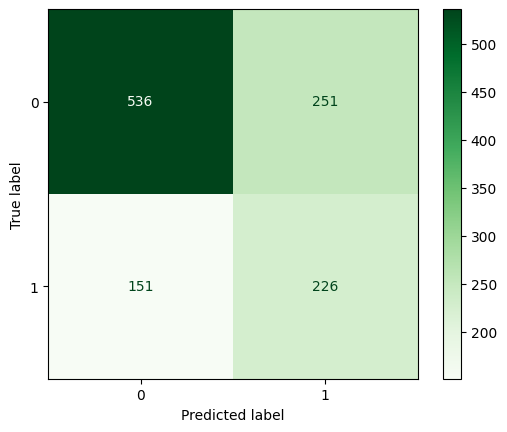

RandomForestClassifier()
The RandomForestClassifier() accuracy score 80.33

               precision    recall  f1-score   support

           0       0.86      0.84      0.85       787
           1       0.69      0.72      0.70       377

    accuracy                           0.80      1164
   macro avg       0.78      0.78      0.78      1164
weighted avg       0.81      0.80      0.80      1164


 the confusion_matrix [[664 123]
 [106 271]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


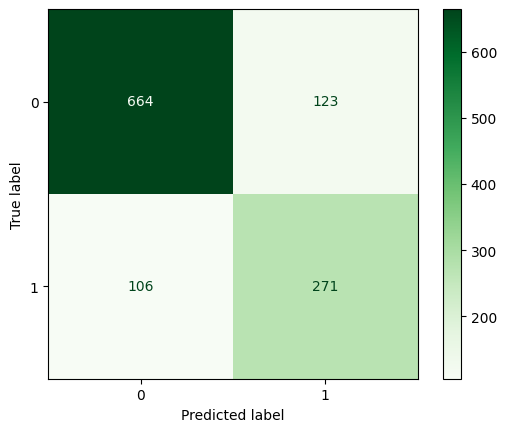

DecisionTreeClassifier()
The DecisionTreeClassifier() accuracy score 78.87

               precision    recall  f1-score   support

           0       0.86      0.82      0.84       787
           1       0.66      0.72      0.69       377

    accuracy                           0.79      1164
   macro avg       0.76      0.77      0.76      1164
weighted avg       0.79      0.79      0.79      1164


 the confusion_matrix [[647 140]
 [106 271]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


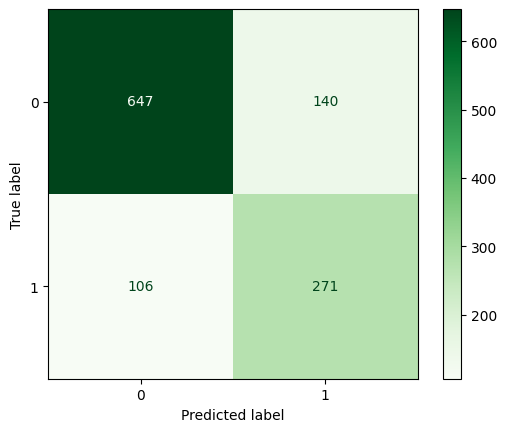

KNeighborsClassifier()
The KNeighborsClassifier() accuracy score 76.37

               precision    recall  f1-score   support

           0       0.82      0.83      0.83       787
           1       0.64      0.62      0.63       377

    accuracy                           0.76      1164
   macro avg       0.73      0.73      0.73      1164
weighted avg       0.76      0.76      0.76      1164


 the confusion_matrix [[655 132]
 [143 234]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


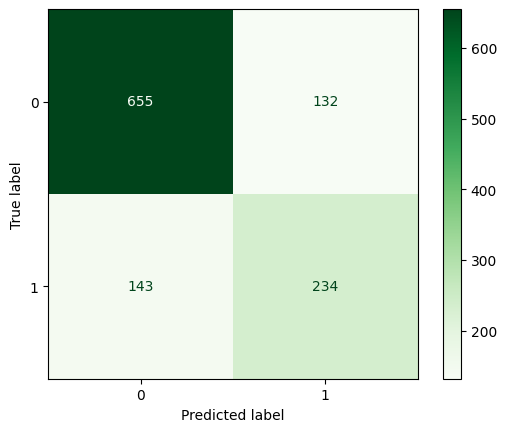

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
The XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,

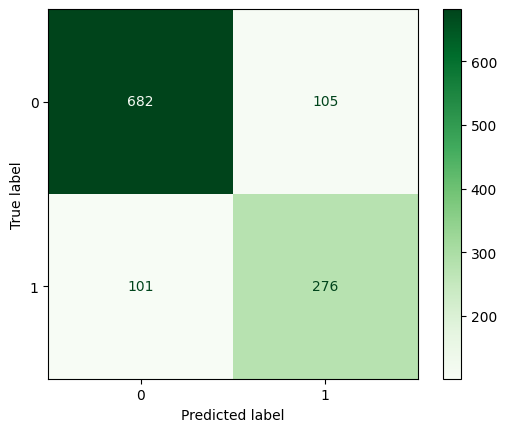

In [25]:
for i in range(len(models)):
    model_names=list(models.values())[i]
    features=list(models.keys())[i]
    classification_model_after_balancing(model_names,X_train,X_test,y_train,y_test)

### Hyperparmeter Turning with GridSearchCv

In [26]:
from sklearn.model_selection import GridSearchCV
# Create a LinearRegression object
lr = LogisticRegression()

# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1','l2'],
    'fit_intercept': [True,False],
    'C': [0.05,0.06,0.1]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'C': 0.05, 'fit_intercept': True, 'penalty': 'l2'}


LogisticRegression(C=0.05)
The LogisticRegression(C=0.05) accuracy score 70.45

 the classification report               precision    recall  f1-score   support

           0       0.73      0.90      0.80       787
           1       0.58      0.31      0.40       377

    accuracy                           0.70      1164
   macro avg       0.66      0.60      0.60      1164
weighted avg       0.68      0.70      0.67      1164


 the confusion_matrix [[705  82]
 [262 115]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


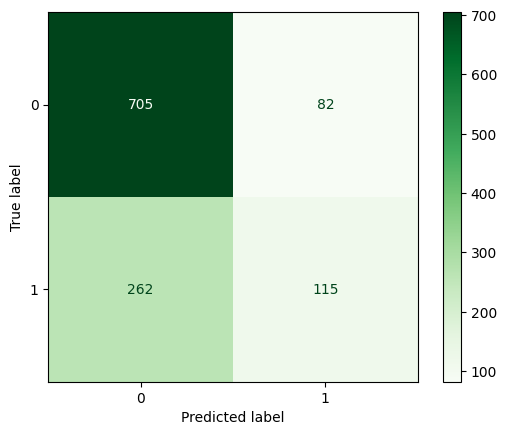

In [27]:
# Linear Regression model
classification_model(LogisticRegression(**{'C': 0.05, 'fit_intercept': True, 'penalty': 'l2'}),X_train,X_test,y_train,y_test)

In [28]:
# # Create a LinearRegression object
# random = RandomForestClassifier()

# # Define the hyperparameter grid
# param_grid = {
#     'n_estimators': [50,60,100,150,200],
#     'criterion': ["gini", "entropy", "log_loss"],
#     'max_depth': [5,8,10,15],
#     'min_samples_split':[2,4,6,8]
    
# }

# # Create a GridSearchCV object
# grid_search = GridSearchCV(random, param_grid, cv=5, scoring='accuracy')
# # Fit the GridSearchCV object to the training data
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters
# print("Best hyperparameters: ", grid_search.best_params_)

In [29]:
# Create a LinearRegression object
Tree = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid = {
    'criterion': ["gini", "entropy", "log_loss"],
    'splitter': ['best','random'],
    'min_samples_split':[2,4,6,8],
    'max_features':['auto','sqrt']
    
}

# Create a GridSearchCV object
grid_search = GridSearchCV(Tree, param_grid, cv=5, scoring='accuracy')
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'criterion': 'log_loss', 'max_features': 'sqrt', 'min_samples_split': 6, 'splitter': 'random'}


DecisionTreeClassifier(criterion='log_loss', max_features='sqrt',
                       min_samples_split=8)
The DecisionTreeClassifier(criterion='log_loss', max_features='sqrt',
                       min_samples_split=8) accuracy score 82.99

 the classification report               precision    recall  f1-score   support

           0       0.84      0.93      0.88       787
           1       0.80      0.63      0.71       377

    accuracy                           0.83      1164
   macro avg       0.82      0.78      0.79      1164
weighted avg       0.83      0.83      0.82      1164


 the confusion_matrix [[728  59]
 [139 238]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


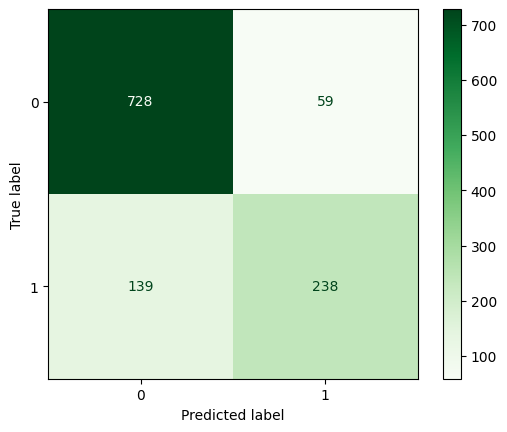

In [30]:
classification_model(DecisionTreeClassifier(**{'criterion': 'log_loss', 'max_features': 'sqrt', 'min_samples_split': 8, 'splitter': 'best'}),X_train,X_test,y_train,y_test)

# Conclusion
In this project, we used EDA and machine learning classification algorithms. Since the data was imbalanced, we applied imbalancing techniques and then all of the classification algorithms. We also performed hyperparameter tuning, which achieved some good results. However, we believe that the project can be further improved.